# Q9 New data.

In [1]:
# Q9: New data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
df = pd.read_csv('csgo_dataset.csv')

print(f'shape: {df.shape}')
print(f'columns: {df.columns}')

# print the 15000th row
print(f'\nrow 15000:\n{df.iloc[15000]}')
# Keep recent matches
df = df.iloc[0:15000]


# create a dataframe with team_1 and team_2 as one column
teams_df = pd.DataFrame()
teams_df['team'] = pd.concat([df['team_1'], df['team_2']])

print(f'\nshape: {teams_df.shape}')
# Nr of unique teams in the dataset
print(f'\nNr of unique teams: {teams_df.team.nunique()}')
print(f'\nNumber of teams with more than 200 matches: {teams_df.team.value_counts()[teams_df.team.value_counts() > 200].count()}')

# Remove all games (rows) with teams that have less than 200 matches in the original dataset
df = df[df.team_1.isin(teams_df.team.value_counts()[teams_df.team.value_counts() > 200].index)]
print(f'\nshape: {df.shape}')
df = df[df.team_2.isin(teams_df.team.value_counts()[teams_df.team.value_counts() > 200].index)]
print(f'\nshape: {df.shape}')

print(f'\nNr of unique teams: {df.team_2.nunique()}')

# create a dataframe with team_1 and team_2 as one column
teams_df = pd.DataFrame()
teams_df['team'] = pd.concat([df['team_1'], df['team_2']])

print(f'\nshape: {teams_df.shape}')
# Nr of unique teams in the dataset
print(f'\nNr of unique teams: {teams_df.team.nunique()}')
print(f'\nNumber of teams with more than 200 matches: {teams_df.team.value_counts()[teams_df.team.value_counts() > 10]}')


shape: (45773, 19)
columns: Index(['date', 'team_1', 'team_2', '_map', 'result_1', 'result_2',
       'map_winner', 'starting_ct', 'ct_1', 't_2', 't_1', 'ct_2', 'event_id',
       'match_id', 'rank_1', 'rank_2', 'map_wins_1', 'map_wins_2',
       'match_winner'],
      dtype='object')

row 15000:
date             2018-11-11
team_1          Red Reserve
team_2                x-kom
_map                 Mirage
result_1                 15
result_2                 19
map_winner                2
starting_ct               1
ct_1                      6
t_2                       9
t_1                       9
ct_2                      6
event_id               4123
match_id            2329036
rank_1                   39
rank_2                  154
map_wins_1                1
map_wins_2                2
match_winner              2
Name: 15000, dtype: object

shape: (30000, 1)

Nr of unique teams: 654

Number of teams with more than 200 matches: 47

shape: (6712, 19)

shape: (3401, 19)

Nr of unique

## Results:
 We now have a df with 3401 games, 47 teams, all with 200+ games in total, and all between [35, 253] games in the final dataset

In [2]:
# change the column map_winner values to 1 and -1
from numpy import sign
from Preprocessing_serieA_function import preprocess_serieA_no_draws as pre

# for i in range(len(df)):
#     if sign(df['result_1'].iloc[i] - df['result_2'].iloc[i]) == 0:
#         print('\nError in row: ', i)
#         print(df.iloc[i])

df = pre(df, 'csgo', remove_draws=True)
print(df.head())
print(f'\nshape: {df.shape}')

     team1            team2  score_diff  y
9   fnatic              BIG          -4 -1
10  Sprout  Movistar Riders           6  1
18     AGO      HellRaisers          11  1
19     AGO      HellRaisers          11  1
20  Sprout  Movistar Riders           9  1
     team1            team2  score_diff  y
9   fnatic              BIG          -4 -1
10  Sprout  Movistar Riders           6  1
18     AGO      HellRaisers          11  1
19     AGO      HellRaisers          11  1
20  Sprout  Movistar Riders           9  1

shape: (3394, 4)


In [3]:
# check to see if there are any draws
nr_of_draws = df[df['score_diff'] == 0].shape[0]
nr_of_draws += df[df['y'] == 0].shape[0]
print(f'\nNr of draws: {nr_of_draws}')


Nr of draws: 0


# CSGO dataset is now preprocessed
### Lets: go

In [4]:
from df_to_dic_script import df_to_dictionary as df_to_dic

# ------------------ OBS ------------------
# Make sure to turn of the extensions to the gibbs sampler by commenting out the extra parameters. 

csgo_dic = df_to_dic(df)
print(csgo_dic.keys())

dict_keys(['Vitality', 'Windigo', 'Tricked', 'Unique', 'INTZ', 'DETONA', 'Astralis', 'Valiance', 'PACT', 'Virtus.pro', 'AVANGAR', 'mousesports', 'ORDER', 'FaZe', 'Grayhound', 'Nemiga', 'FURIA', 'SJ', 'DreamEaters', 'Heretics', 'AGO', 'TeamOne', 'Chaos', 'ALTERNATE aTTaX', 'Spirit', 'BIG', 'forZe', 'HAVU', 'North', 'fnatic', 'Sprout', 'Winstrike', 'Heroic', 'NiP', 'Singularity', 'pro100', 'Liquid', 'Chiefs', 'G2', 'ENCE', 'MIBR', 'Copenhagen Flames', 'HellRaisers', 'Movistar Riders', 'TYLOO', 'GamerLegion', 'W7M'])


In [5]:
# ADF
from ADF_script import ADF

results_dic, predictions = ADF(csgo_dic, df)


Current game: 150: team1 PACT with prior skill 25.0 and variance 64.00 vs team2 pro100 with skill 28.6 and variance 7.08
Prediction: -1, result : -1, score difference: -5
Updated skill team1: 23.7 and variance 5.67 vs team2: 28.7 and variance 5.65

Current game: 330: team1 Heroic with prior skill 25.0 and variance 64.00 vs team2 Copenhagen Flames with skill 29.1 and variance 0.33
Prediction: -1, result : -1, score difference: -3
Updated skill team1: 24.6 and variance 0.37 vs team2: 29.1 and variance 0.34

Current game: 510: team1 Copenhagen Flames with prior skill 29.1 and variance 0.19 vs team2 Chaos with skill 33.7 and variance 0.21
Prediction: -1, result : 1, score difference: 4
Updated skill team1: 32.6 and variance 0.10 vs team2: 30.0 and variance 0.11

Current game: 600: team1 DETONA with prior skill 20.3 and variance 0.06 vs team2 BIG with skill 24.5 and variance 0.04
Prediction: -1, result : -1, score difference: -6
Updated skill team1: 20.0 and variance 0.03 vs team2: 24.7 an

In [6]:
# Create dataframe of means and variances an sort by means
from numpy import sign
from sklearn.metrics import accuracy_score
teams_df = pd.DataFrame(results_dic, index=['mean', 'variance']).T
teams_df = teams_df.sort_values(by=['mean'], ascending=False)
print('Teams after the season, no shuffle:')
print(teams_df)

# Calculate prediction rate
from sklearn.metrics import accuracy_score
y_true = sign(df['score_diff']).tolist()
prediction_rate = accuracy_score(y_true, predictions)
print(f'\nPrediction rate of One-Step-Ahead prediction: {prediction_rate}')

# prediction rate of last 60 games
y_true_last_60 = y_true[-60:]
predictions_last_60 = predictions[-60:]
prediction_rate_last_60 = accuracy_score(y_true_last_60, predictions_last_60)
print(f'\nPrediction rate of One-Step-Ahead prediction for last 60 games: {prediction_rate_last_60}')

Teams after the season, no shuffle:
                        mean  variance
fnatic             33.715879  0.066345
HAVU               32.874459  0.059243
Astralis           32.844009  0.012130
MIBR               31.861681  0.031765
Spirit             30.839005  0.016055
NiP                30.478909  0.072770
pro100             29.779523  0.056717
SJ                 29.760865  0.041657
North              29.683937  0.076644
Valiance           29.531803  0.018945
mousesports        29.398481  0.033911
Windigo            28.990866  0.031833
Chiefs             28.917929  0.025914
Winstrike          28.846077  0.018643
Liquid             28.827443  0.009985
Sprout             28.740751  0.004090
AVANGAR            28.667411  0.007619
TYLOO              28.001198  0.012988
Copenhagen Flames  27.703424  0.029418
G2                 27.433178  0.034572
FURIA              27.428545  0.024024
ENCE               27.041640  0.015113
HellRaisers        27.006508  0.024096
BIG                26.686378

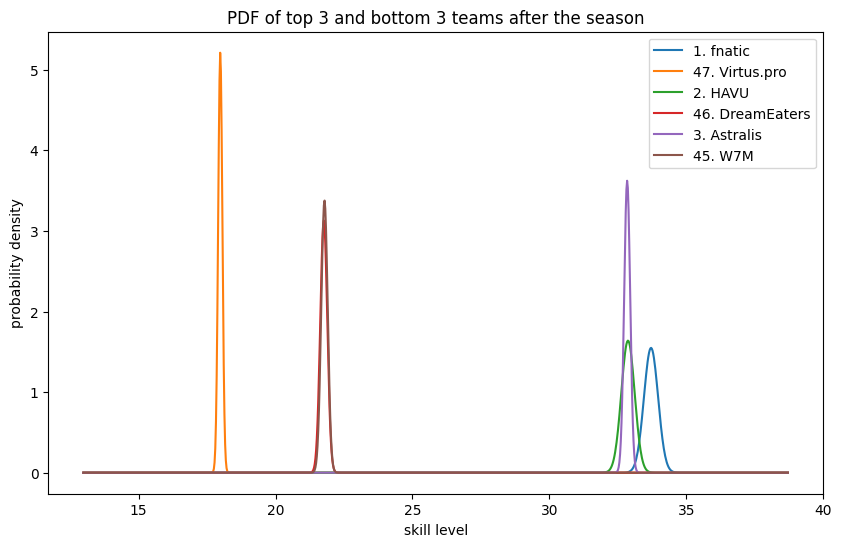

In [7]:
# Plot the pdf of the three top teams and the three bottom teams
from scipy import stats
plt.figure(figsize=(10, 6))
x = np.linspace(min(teams_df['mean'])-5, max(teams_df['mean'])+5, 1000)

for i in range(3):
    y_top = stats.norm.pdf(x, teams_df.iloc[i, 0], np.sqrt(teams_df.iloc[i, 1]))
    y_bottom = stats.norm.pdf(x, teams_df.iloc[-i-1, 0], np.sqrt(teams_df.iloc[-i-1, 1]))

    plt.plot(x, y_top, label=f'{i+1}. {teams_df.index[i]}')
    plt.plot(x, y_bottom, label=f'{len(teams_df)-i}. {teams_df.index[-i-1]}')

plt.title('PDF of top 3 and bottom 3 teams after the season')
plt.xlabel('skill level')
plt.ylabel('probability density')
plt.legend()
plt.show()